## Relax Challenge

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .
We suggest spending 12
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

### Packages

In [1]:
#loading packages
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import pandas as pd
import numpy as np
from datetime import datetime,timedelta

from matplotlib import pyplot as plt 
import seaborn as sns


In [2]:
!ls

Relax_challenge.ipynb            takehome_user_engagement.csv
relax_data_science_challenge.pdf takehome_users.csv


### Loading files, reading data

In [3]:
data_user=pd.read_csv('takehome_users.csv', encoding='cp1252')
data_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
data_user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [5]:
data_user_eng=pd.read_csv('takehome_user_engagement.csv', encoding='cp1252')
data_user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
data_user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
data_user_eng.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


### Processing data
#### data_user 

- The date, year, month, day, hour and day of the week from datetime creation data will be generate.
- New data named **invited**: shows whether an user has been invited by other users or not
- New data named **group_count**: the number of users in each org_id group

In [8]:
data_user.creation_time=pd.to_datetime(data_user.creation_time)

data_user['invited']=data_user.invited_by_user_id.apply(lambda x: 0 if np.isnan(x) else 1)
data_user['creation_date']=data_user.creation_time.apply(lambda x: x.date())    
data_user['creation_year']=data_user.creation_time.apply(lambda x: x.year)
data_user['creation_month']=data_user.creation_time.apply(lambda x: x.month)
data_user['creation_day']=data_user.creation_time.apply(lambda x: x.day)
data_user['creation_hour']=data_user.creation_time.apply(lambda x: x.hour)
data_user['creation_dow']=data_user.creation_time.apply(lambda x: x.weekday())    

data_user=data_user.join(pd.DataFrame({'group_count':data_user.groupby('org_id').org_id.count()}),on='org_id')


In [9]:
data_user.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,creation_date,creation_year,creation_month,creation_day,creation_hour,creation_dow,group_count
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1,2013-09-06,2013,9,6,6,4,40
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,2013-01-10,2013,1,10,18,3,25
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1,2014-04-27,2014,4,27,12,6,27
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,2012-05-31,2012,5,31,11,3,138
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN,0,2014-01-26,2014,1,26,8,6,319


#### data_user_eng
- generate date, year,month,day,hour and day of the week of the time_stamp 
- generate **num_act** : the number of activity for each user
- generate **duration**: the number of the day between first entry and the last entry for every user
- generate **rate_daily_log**: the number of entries  / the number of all entries for each day. rate_daily_log can show how much people were active in each day. 

In [10]:
data_user_eng.time_stamp=pd.to_datetime(data_user_eng.time_stamp)

data_user_eng=data_user_eng.join(pd.DataFrame({'duration':data_user_eng.groupby("user_id").time_stamp.last()\
                -data_user_eng.groupby("user_id").time_stamp.first()}),on='user_id')

data_user_eng=data_user_eng.join(pd.DataFrame({'num_act':data_user_eng.groupby("user_id").user_id.count()}),on='user_id')

data_user_eng.duration=data_user_eng.duration.apply(lambda x: x.days)
data_user_eng['time_stamp_date']=data_user_eng.time_stamp.apply(lambda x: x.strftime('%Y-%m-%d'))
data_user_eng['time_stamp_year']=data_user_eng.time_stamp.apply(lambda x: x.year)
data_user_eng['time_stamp_month']=data_user_eng.time_stamp.apply(lambda x: x.month)
data_user_eng['time_stamp_day']=data_user_eng.time_stamp.apply(lambda x: x.day)
data_user_eng['time_stamp_hour']=data_user_eng.time_stamp.apply(lambda x: x.hour)
data_user_eng['time_stamp_dow']=data_user_eng.time_stamp.apply(lambda x: x.weekday())
 

In [11]:
# Some user_id s are missing for example:
data_user_eng.loc[data_user_eng.user_id==8]

,time_stamp,user_id,visited,duration,num_act,time_stamp_date,time_stamp_year,time_stamp_month,time_stamp_day,time_stamp_hour,time_stamp_dow


In [12]:
data_user_eng.groupby("user_id").time_stamp.last().head()

user_id
1   2014-04-22 03:53:30
2   2014-03-31 03:45:04
3   2013-03-19 23:14:52
4   2013-05-22 08:09:28
5   2013-01-22 10:14:20
Name: time_stamp, dtype: datetime64[ns]

In [13]:
data_user_eng.groupby("user_id").time_stamp.first().head()

user_id
1   2014-04-22 03:53:30
2   2013-11-15 03:45:04
3   2013-03-19 23:14:52
4   2013-05-22 08:09:28
5   2013-01-22 10:14:20
Name: time_stamp, dtype: datetime64[ns]

In [14]:
data_user_eng=data_user_eng.join(pd.DataFrame({'rate_daily_log':data_user_eng.groupby('time_stamp_date').\
                                               time_stamp.count()/data_user_eng.time_stamp_date.nunique()}),on='time_stamp_date')



In [15]:
data_user_eng.head() 

,time_stamp,user_id,visited,duration,num_act,time_stamp_date,time_stamp_year,time_stamp_month,time_stamp_day,time_stamp_hour,time_stamp_dow,rate_daily_log
0,2014-04-22 03:53:30,1,1,0,1,2014-04-22,2014,4,22,3,1,0.861413
1,2013-11-15 03:45:04,2,1,136,14,2013-11-15,2013,11,15,3,4,0.604620
2,2013-11-29 03:45:04,2,1,136,14,2013-11-29,2013,11,29,3,4,0.610054
3,2013-12-09 03:45:04,2,1,136,14,2013-12-09,2013,12,9,3,0,0.627717
4,2013-12-25 03:45:04,2,1,136,14,2013-12-25,2013,12,25,3,2,0.691576


## Visualization

In [16]:
data_user.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,creation_date,creation_year,creation_month,creation_day,creation_hour,creation_dow,group_count
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,2014-04-22,2014,4,22,3,1,75
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,2013-11-15,2013,11,15,3,4,233


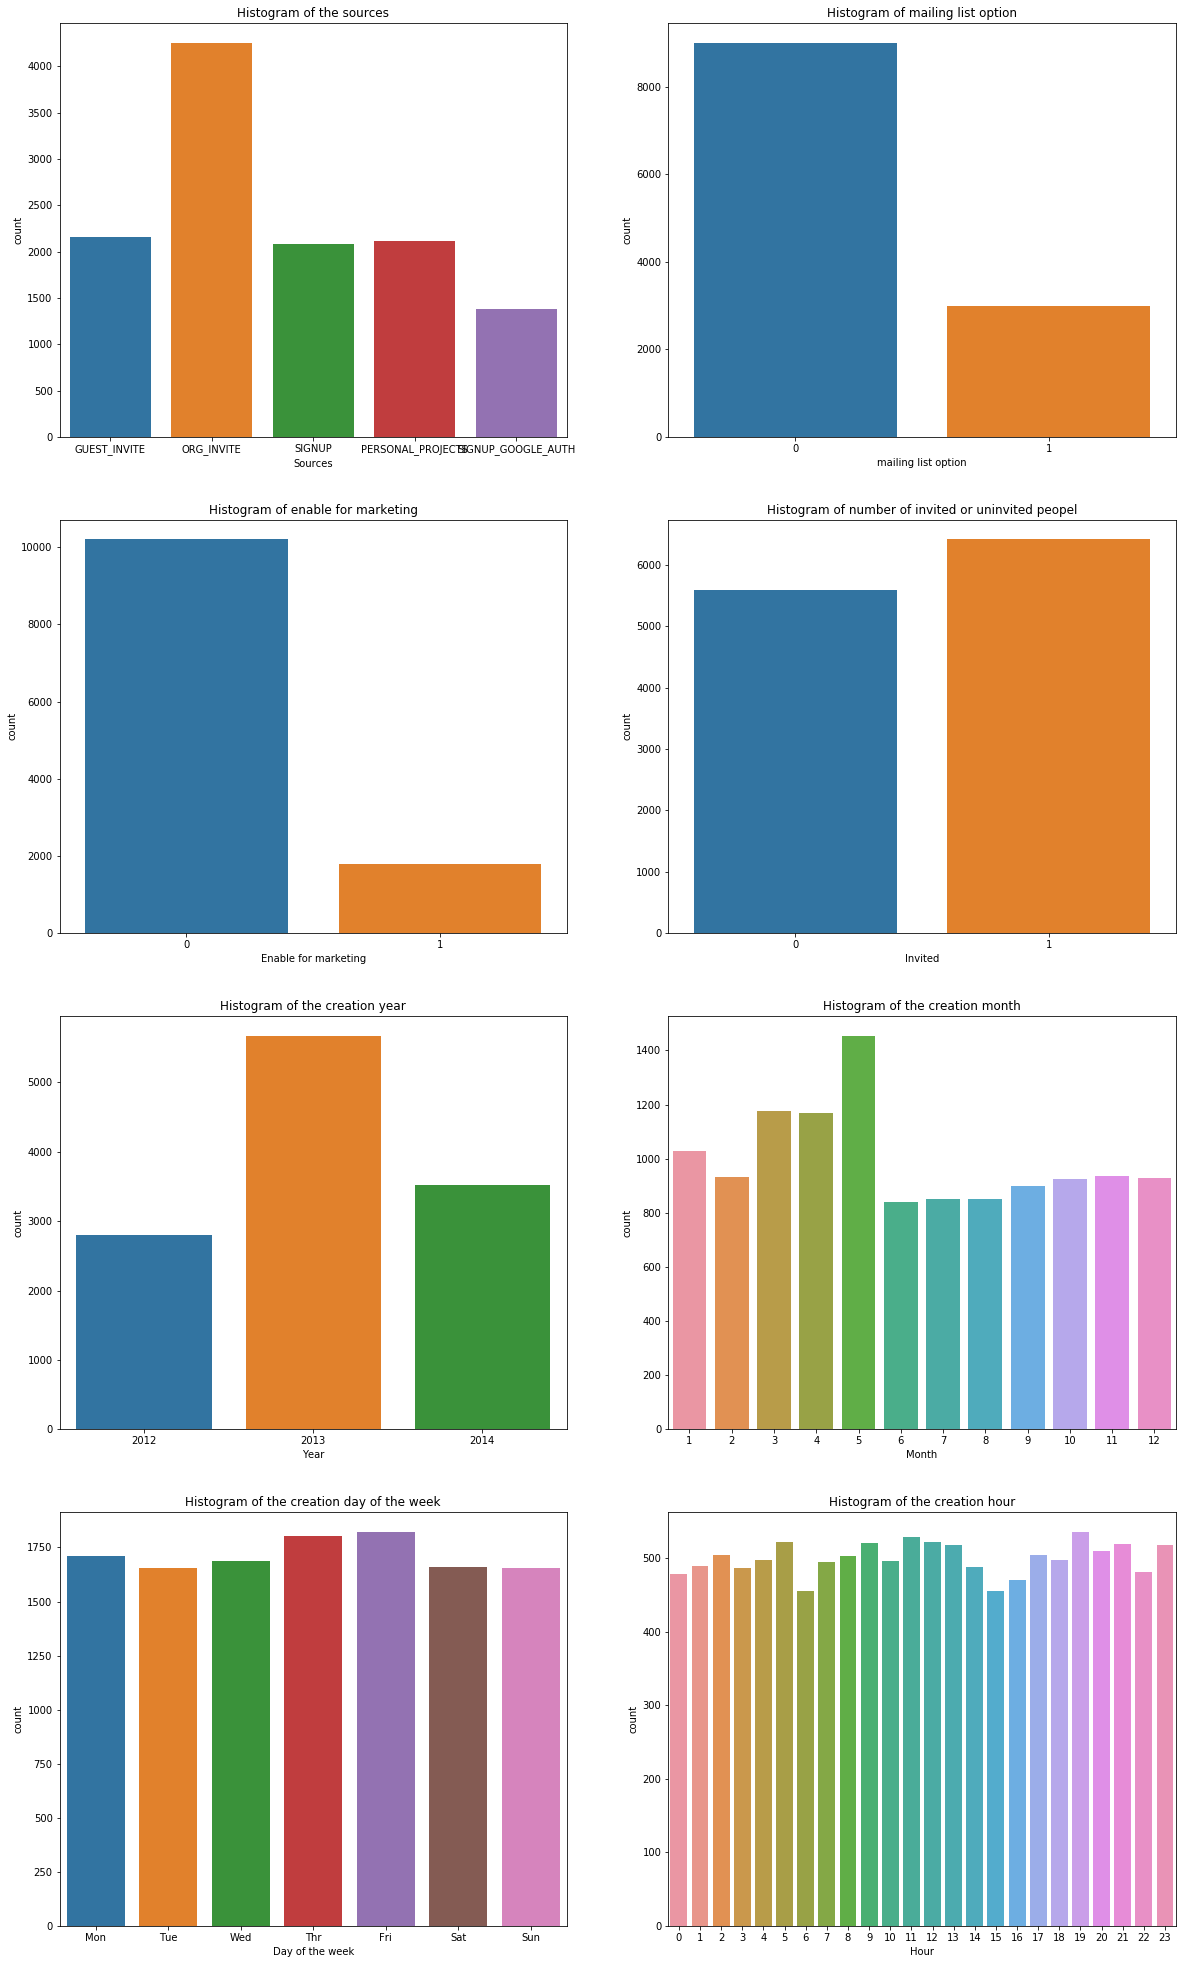

In [17]:
#User data
fig,axes=plt.subplots(4,2,figsize=(20,35))

sns.countplot(data_user.creation_source,ax=axes[0,0])
axes[0,0].set_title('Histogram of the sources')
axes[0,0].set_xlabel('Sources')
sns.countplot(data_user.opted_in_to_mailing_list,ax=axes[0,1])
axes[0,1].set_title('Histogram of mailing list option')
axes[0,1].set_xlabel('mailing list option')
sns.countplot(data_user.enabled_for_marketing_drip,ax=axes[1,0])
axes[1,0].set_title('Histogram of enable for marketing')
axes[1,0].set_xlabel('Enable for marketing')
sns.countplot(data_user.invited,ax=axes[1,1])
axes[1,1].set_title('Histogram of number of invited or uninvited peopel')
axes[1,1].set_xlabel('Invited')
sns.countplot(data_user.creation_year,ax=axes[2,0])
axes[2,0].set_title('Histogram of the creation year')
axes[2,0].set_xlabel('Year')
sns.countplot(data_user.creation_month,ax=axes[2,1])
axes[2,1].set_title('Histogram of the creation month')
axes[2,1].set_xlabel('Month')
sns.countplot(data_user.creation_dow,ax=axes[3,0])
axes[3,0].set_title('Histogram of the creation day of the week')
label=['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
axes[3,0].set_xlabel('Day of the week')
axes[3,0].set_xticklabels(label)
sns.countplot(data_user.creation_hour,ax=axes[3,1])
axes[3,1].set_title('Histogram of the creation hour')
axes[3,1].set_xlabel('Hour')


plt.show()
plt.close(fig)

In [18]:
data_user.creation_date.value_counts().sort_values(ascending=False)[0:20]

2014-05-30    71
2014-05-29    49
2014-05-28    45
2014-05-21    42
2014-05-27    41
2014-05-24    39
2014-05-26    39
2014-05-25    37
2014-05-23    35
2014-05-16    35
2014-04-27    34
2014-05-18    34
2014-03-03    33
2014-05-13    33
2014-03-14    32
2014-05-22    32
2014-04-17    31
2013-03-14    31
2014-05-14    31
2014-05-03    31
Name: creation_date, dtype: int64

In [19]:
data_user.org_id.value_counts().sort_values(ascending=False)[0:20]

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
8      97
14     87
11     75
12     75
17     74
18     73
13     72
16     72
20     68
15     64
Name: org_id, dtype: int64

#### results:
- Above graphs show most of people intend to no to be added in the marketing and mailing list. 
- There are more people signed up becasue of an organization were invited them
- There are more creation in second year, 2013
- No significant changes have been seen in terms of day and time of the day. However, the number of creations increases in May, espicially toward to the end of May. 
- Looking at org_id shows organization with lower id consist of higher number of people 

In [20]:
data_user_eng.head(2)

,time_stamp,user_id,visited,duration,num_act,time_stamp_date,time_stamp_year,time_stamp_month,time_stamp_day,time_stamp_hour,time_stamp_dow,rate_daily_log
0,2014-04-22 03:53:30,1,1,0,1,2014-04-22,2014,4,22,3,1,0.861413
1,2013-11-15 03:45:04,2,1,136,14,2013-11-15,2013,11,15,3,4,0.604620


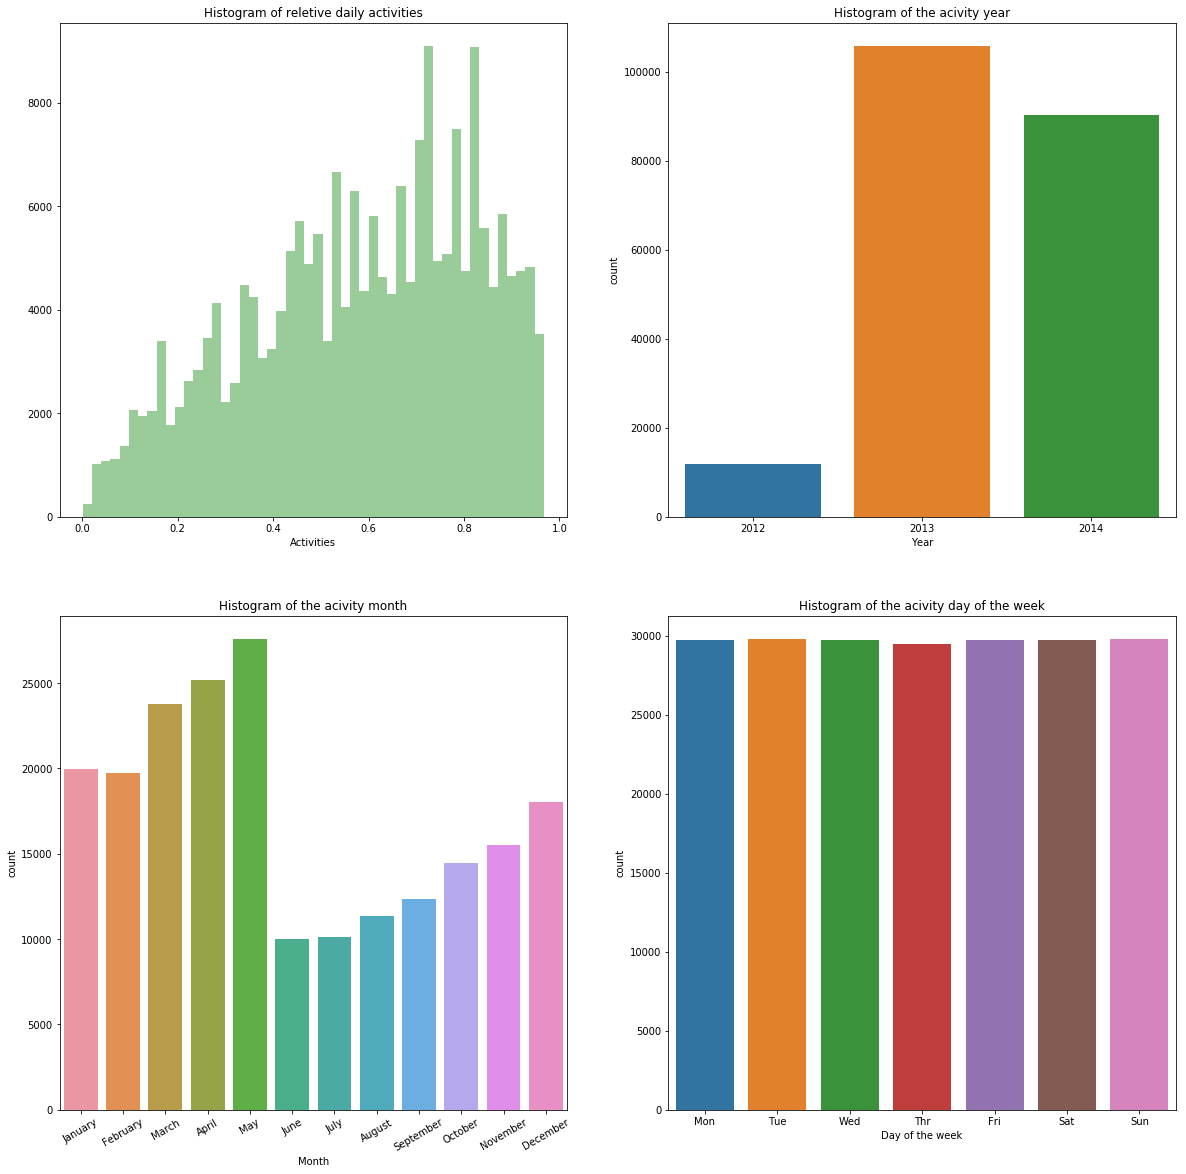

In [21]:
#User data
fig,axes=plt.subplots(2,2,figsize=(20,20))

sns.distplot(data_user_eng.rate_daily_log,bins=50,kde=False,ax=axes[0,0],color='g')
axes[0,0].set_title('Histogram of reletive daily activities')
axes[0,0].set_xlabel('Activities')
sns.countplot(data_user_eng.time_stamp_year,ax=axes[0,1])
axes[0,1].set_title('Histogram of the acivity year')
axes[0,1].set_xlabel('Year')

sns.countplot(data_user_eng.time_stamp_month,ax=axes[1,0])
label = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
axes[1,0].set_title('Histogram of the acivity month')
axes[1,0].set_xlabel('Month')
axes[1,0].set_xticklabels(label,rotation=30)

sns.countplot(data_user_eng.time_stamp_dow,ax=axes[1,1])
axes[1,1].set_title('Histogram of the acivity day of the week')
label=['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
axes[1,1].set_xlabel('Day of the week')
axes[1,1].set_xticklabels(label)

plt.show()
plt.close(fig)

Text(0.5, 0, 'Hour')

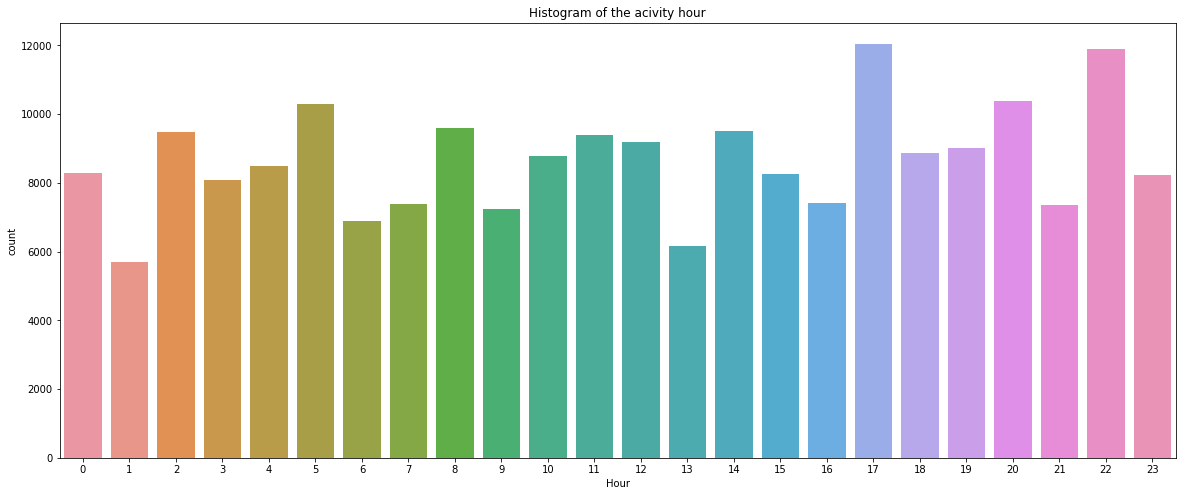

In [22]:
fig,ax1=plt.subplots(1,1,figsize=(20,8))
sns.countplot(data_user_eng.time_stamp_hour,ax=ax1)
ax1.set_title('Histogram of the acivity hour')
ax1.set_xlabel('Hour')


In [23]:
data_user_eng.duration.value_counts().sort_values(ascending=False)[0:20]

699    9758
643    7592
615    6560
0      6235
559    5853
587    5278
671    5252
475    4235
503    3571
531    3528
391    3359
447    2863
558    2439
363    2396
727    2013
688    1989
723    1987
279    1950
307    1824
696    1704
Name: duration, dtype: int64

In [24]:
data_user_eng.num_act.value_counts().sort_values(ascending=False)[0:20]

1      6235
463    1852
304    1824
217    1736
326    1630
487    1461
291    1455
289    1445
319    1276
308    1232
408    1224
406    1218
405    1215
243    1215
237    1185
229    1145
374    1122
272    1088
271    1084
361    1083
Name: num_act, dtype: int64

#### Results:
- There are more activities in second and third year and in May
- Peopel intend to have long history of activies as most peopel have duration higher than 500 days
- Despite poepel who only were active only for one day or just put there info, most peopel have number of acivity larger than 200.

### determining the dependent variable

Based on project: Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period. So:
- find users who have less than 3 logs
- users with more than the 3 logs
    - search within a 7 days period
    - if they are have 3 or more than 3 entries in different days, label them as adopted



In [25]:
data_user_eng["adopted"]=data_user_eng.duration.astype(int).apply(lambda x: 0 if x<3 else np.nan)
print('Number non-adopted entries: ',np.shape(data_user_eng.loc[data_user_eng["adopted"]==0,:])[0])


Number non-adopted entries:  6281


In [26]:
len(data_user_eng.loc[data_user_eng.adopted!=0,:].index.unique())

201636

In [27]:
#user_id is the index, checking for user_id=10
data_user_eng.head()

,time_stamp,user_id,visited,duration,num_act,time_stamp_date,time_stamp_year,time_stamp_month,time_stamp_day,time_stamp_hour,time_stamp_dow,rate_daily_log,adopted
0,2014-04-22 03:53:30,1,1,0,1,2014-04-22,2014,4,22,3,1,0.861413,0.0
1,2013-11-15 03:45:04,2,1,136,14,2013-11-15,2013,11,15,3,4,0.604620,NaN
2,2013-11-29 03:45:04,2,1,136,14,2013-11-29,2013,11,29,3,4,0.610054,NaN
3,2013-12-09 03:45:04,2,1,136,14,2013-12-09,2013,12,9,3,0,0.627717,NaN
4,2013-12-25 03:45:04,2,1,136,14,2013-12-25,2013,12,25,3,2,0.691576,NaN


In [28]:

def num_log(user):
    result=0
    count_log=0
    itr=user.index[0]
    #print(user)
    while (count_log <3) & (itr<len(user.loc[:,'time_stamp'])):
        location=((user.loc[:,'time_stamp']>=user.loc[itr,'time_stamp'])&\
                   (user.loc[:,'time_stamp']<user.loc[itr,'time_stamp']+timedelta(days=7)))
        
        count_log=location.sum()
        #print(user.loc[location,'time_stamp'].dt.day.duplicated().any(),count_log)
        if count_log >=3:
            if not user.loc[location,'time_stamp'].dt.day.duplicated().any():
                result=1
            else: result=0
        #print('Adopted:',itr,count_log,result)    
        itr=itr+count_log
    return result

group=data_user_eng.loc[data_user_eng.adopted!=0,:].groupby('user_id')

for i in group.groups:
    section_user=group.get_group(i)
    indx=np.where((data_user_eng.user_id==i)&(data_user_eng.adopted!=0))[0]
    #print(i,section_user,indx)
    data_user_eng.loc[indx,'adopted']=num_log(section_user)
    


In [29]:
data_user_eng.head()

,time_stamp,user_id,visited,duration,num_act,time_stamp_date,time_stamp_year,time_stamp_month,time_stamp_day,time_stamp_hour,time_stamp_dow,rate_daily_log,adopted
0,2014-04-22 03:53:30,1,1,0,1,2014-04-22,2014,4,22,3,1,0.861413,0.0
1,2013-11-15 03:45:04,2,1,136,14,2013-11-15,2013,11,15,3,4,0.604620,1.0
2,2013-11-29 03:45:04,2,1,136,14,2013-11-29,2013,11,29,3,4,0.610054,1.0
3,2013-12-09 03:45:04,2,1,136,14,2013-12-09,2013,12,9,3,0,0.627717,1.0
4,2013-12-25 03:45:04,2,1,136,14,2013-12-25,2013,12,25,3,2,0.691576,1.0


In [30]:
data_user.isnull().any()

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
invited                       False
creation_date                 False
creation_year                 False
creation_month                False
creation_day                  False
creation_hour                 False
creation_dow                  False
group_count                   False
dtype: bool

#### Cleaning data
visited data in data_user_eng only got value of 1. so we can delete it.

In [31]:
(data_user_eng.visited!=1).any()

False

In [32]:
#all values of column visited is 1 therefore we delete it
data_user_eng=data_user_eng.drop(['visited'],axis=1)

In [33]:
data_user.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,creation_date,creation_year,creation_month,creation_day,creation_hour,creation_dow,group_count
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,2014-04-22,2014,4,22,3,1,75
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,2013-11-15,2013,11,15,3,4,233


### Merging data sets

In [34]:
df=data_user.drop(['name','email','invited_by_user_id','org_id','last_session_creation_time'],axis=1).rename(columns={'object_id': 'user_id'})\
.set_index('user_id').join(data_user_eng.reset_index().set_index('user_id'),on='user_id',how='inner').reset_index()
df.head()

,user_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,creation_date,creation_year,creation_month,creation_day,...,duration,num_act,time_stamp_date,time_stamp_year,time_stamp_month,time_stamp_day,time_stamp_hour,time_stamp_dow,rate_daily_log,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,1,2014-04-22,2014,4,22,...,0,1,2014-04-22,2014,4,22,3,1,0.861413,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,2013-11-15,2013,11,15,...,136,14,2013-11-15,2013,11,15,3,4,0.604620,1.0
2,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,2013-11-15,2013,11,15,...,136,14,2013-11-29,2013,11,29,3,4,0.610054,1.0
3,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,2013-11-15,2013,11,15,...,136,14,2013-12-09,2013,12,9,3,0,0.627717,1.0
4,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,2013-11-15,2013,11,15,...,136,14,2013-12-25,2013,12,25,3,2,0.691576,1.0


In [35]:
df.isnull().any()

user_id                       False
creation_time                 False
creation_source               False
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
invited                       False
creation_date                 False
creation_year                 False
creation_month                False
creation_day                  False
creation_hour                 False
creation_dow                  False
group_count                   False
index                         False
time_stamp                    False
duration                      False
num_act                       False
time_stamp_date               False
time_stamp_year               False
time_stamp_month              False
time_stamp_day                False
time_stamp_hour               False
time_stamp_dow                False
rate_daily_log                False
adopted                       False
dtype: bool

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 25 columns):
user_id                       207917 non-null int64
creation_time                 207917 non-null datetime64[ns]
creation_source               207917 non-null object
opted_in_to_mailing_list      207917 non-null int64
enabled_for_marketing_drip    207917 non-null int64
invited                       207917 non-null int64
creation_date                 207917 non-null object
creation_year                 207917 non-null int64
creation_month                207917 non-null int64
creation_day                  207917 non-null int64
creation_hour                 207917 non-null int64
creation_dow                  207917 non-null int64
group_count                   207917 non-null int64
index                         207917 non-null int64
time_stamp                    207917 non-null datetime64[ns]
duration                      207917 non-null int64
num_act                       207917 

In [37]:
#There are some users from data_user that are not in data_user_eng so we will remove them
data_user.object_id.isin(data_user_eng.reset_index().user_id).all()

False

In [38]:
print(np.shape(df),'\n',df.keys())

(207917, 25) 
 Index(['user_id', 'creation_time', 'creation_source',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited',
       'creation_date', 'creation_year', 'creation_month', 'creation_day',
       'creation_hour', 'creation_dow', 'group_count', 'index', 'time_stamp',
       'duration', 'num_act', 'time_stamp_date', 'time_stamp_year',
       'time_stamp_month', 'time_stamp_day', 'time_stamp_hour',
       'time_stamp_dow', 'rate_daily_log', 'adopted'],
      dtype='object')


## Model
- There are lots of categorical features like date and time components.
- devide independent features  into categorical features, numerical features
- make dummy variables using hotencoding method
- since there are large number of categorical features, we need to find a way to 1- reduce the time of running time 2- avoide curse of dimensionalty. Here, MCA has been used which is equivalent technique PCA for categorical features.
- Defining traing set and test set by splitting data
- Scaling  data using StandardScaler
- The approach is taring a random forest calssifier and tuning it using gridsearch


### Defining dependent and independent variables

In [39]:
#Categorical features
x_cat_keys=['creation_source','time_stamp_year','time_stamp_month', 'time_stamp_day', 'time_stamp_hour', 'time_stamp_dow',
       'opted_in_to_mailing_list','enabled_for_marketing_drip','invited']
#Numerical features
x_num_keys=['group_count', 'rate_daily_log', 'duration','num_act']

X_cat=df.loc[:,x_cat_keys]
X_num=df.loc[:,x_num_keys]
y=df.loc[:,'adopted']



In [40]:
np.abs(df.loc[:,['group_count', 'rate_daily_log', 'duration','num_act','adopted']].corr(method='pearson').adopted)

group_count       0.011293
rate_daily_log    0.004040
duration          0.002058
num_act           0.003717
adopted           1.000000
Name: adopted, dtype: float64

In [41]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 9 columns):
creation_source               207917 non-null object
time_stamp_year               207917 non-null int64
time_stamp_month              207917 non-null int64
time_stamp_day                207917 non-null int64
time_stamp_hour               207917 non-null int64
time_stamp_dow                207917 non-null int64
opted_in_to_mailing_list      207917 non-null int64
enabled_for_marketing_drip    207917 non-null int64
invited                       207917 non-null int64
dtypes: int64(8), object(1)
memory usage: 14.3+ MB


In [42]:
np.shape(X_num)

(207917, 4)

In [43]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
group_count       207917 non-null int64
rate_daily_log    207917 non-null float64
duration          207917 non-null int64
num_act           207917 non-null int64
dtypes: float64(1), int64(3)
memory usage: 6.3 MB


#### Encoding categorical features

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for i in range(len(x_cat_keys)):
    X_cat.iloc[:, i] = labelencoder_X.fit_transform(X_cat.iloc[:, i])
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3,4,5,6,7,8])
X_cat = onehotencoder.fit_transform(X_cat).toarray()


/Users/leilasapple/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [45]:
X_cat[:,1:6]

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

#### Dimension reduction

In [46]:
# Dimension reduction for categorical featrures
import prince
mca = prince.MCA(n_components=3,n_iter=5,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(X_cat)
X_cat=mca.transform(X_cat)

In [47]:
print(np.shape(X_cat)[0]==np.shape(X_num)[0])

True


In [48]:
X_cat.isnull().any()

0    False
1    False
2    False
dtype: bool

In [49]:
X=pd.concat([X_cat,X_num],axis=1)

In [50]:
X.head()

,0,1,2,group_count,rate_daily_log,duration,num_act
0,0.183631,0.056387,-0.191756,75,0.861413,0,1
1,0.121043,-0.187298,0.161887,233,0.604620,136,14
2,0.120967,-0.188702,0.176742,233,0.610054,136,14
3,0.120083,-0.185055,0.165553,233,0.627717,136,14
4,0.121634,-0.183800,0.158669,233,0.691576,136,14


In [51]:
np.shape(X_cat)

(207917, 3)

#### Spliting data into training and test sets

In [52]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


#### Scaling features

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


/Users/leilasapple/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/leilasapple/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/leilasapple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


#### Random forest calssification and tuning hyperparameters

In [59]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators'      : [100,400,700],
    'max_depth'         : [8, 10,15],
    'random_state'      : [0],
    'max_features': ['auto'],
    'criterion' :['gini']
}

clf=RandomForestClassifier()
grid=GridSearchCV(clf,parameters,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
rf_clf=grid.best_estimator_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400, 'random_state': 0}


#### Feature importance

Text(0.5, 0, 'Relative Importance')

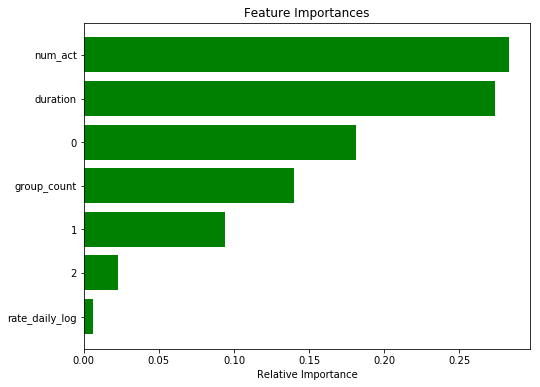

In [60]:
importances = rf_clf.feature_importances_
features=X.keys()
indices = np.argsort(importances)

plt.figure(1,figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[j] for j in indices])
plt.xlabel('Relative Importance')

#### validating the model

In [61]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score

Y_pred=rf_clf.predict(X_test)
print(roc_auc_score(y_test, Y_pred)) 
print('AUC: %f'%roc_auc_score(y_test, Y_pred)) 
print('F1 score: %f'%f1_score(y_test, Y_pred, average='binary')  )
print("Accuracy: %.2f%%" % (accuracy_score(y_test, Y_pred) * 100.0))

0.9938271604938271
AUC: 0.993827
F1 score: 0.993789
Accuracy: 100.00%
